In [1]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib.pyplot
%pip install statsmodels
%pip install matplotlib
%pip install openpyxl
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot



Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

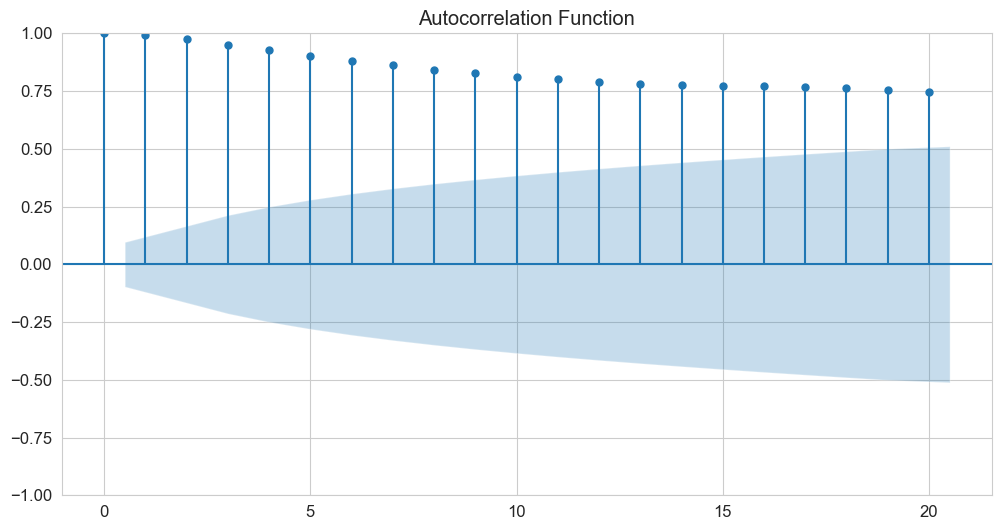

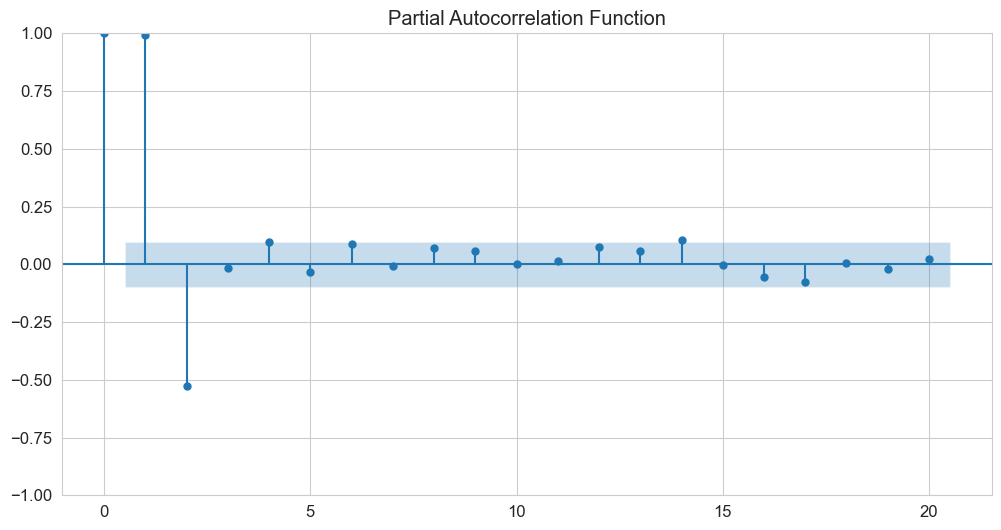

Selected ARIMA order: (1, 1, 1)


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    pfr   No. Observations:                  412
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3582.821
Date:                Mon, 24 Mar 2025   AIC                           7171.642
Time:                        17:18:55   BIC                           7183.697
Sample:                    02-09-2015   HQIC                          7176.411
                         - 12-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3853      0.089      4.321      0.000       0.211       0.560
ma.L1          0.0227      0.106      0.214      0.830      -0.184       0.230
sigma2       1.94e+06   5.18e+04     37.438      0.0

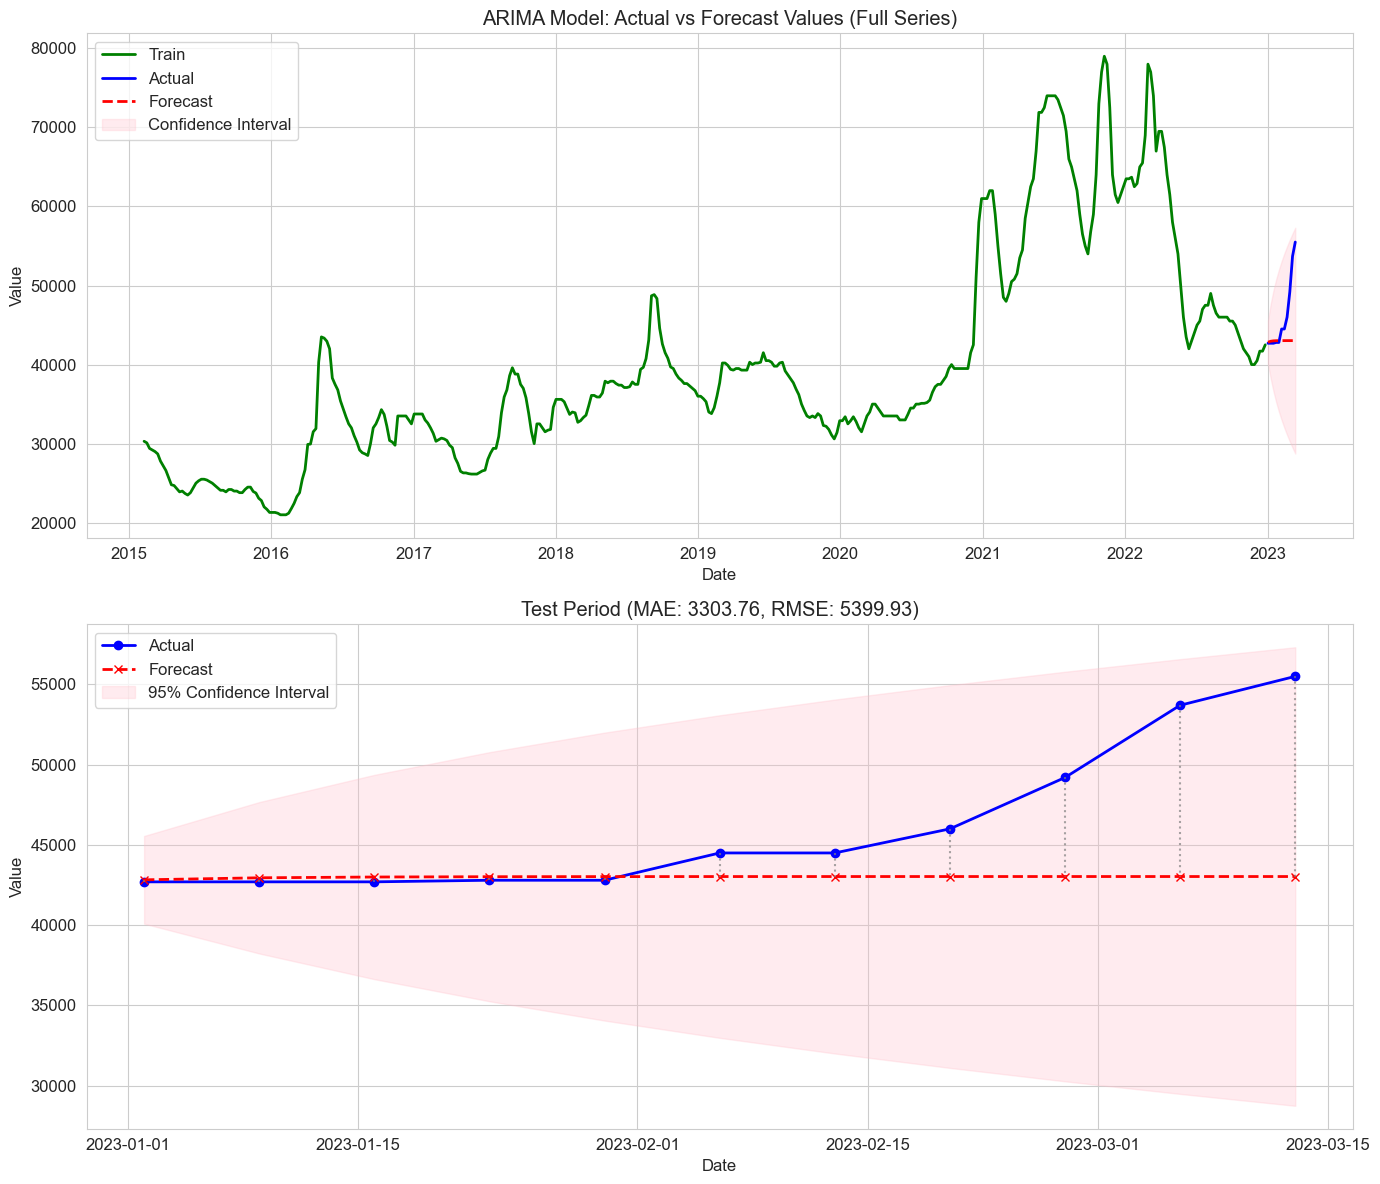

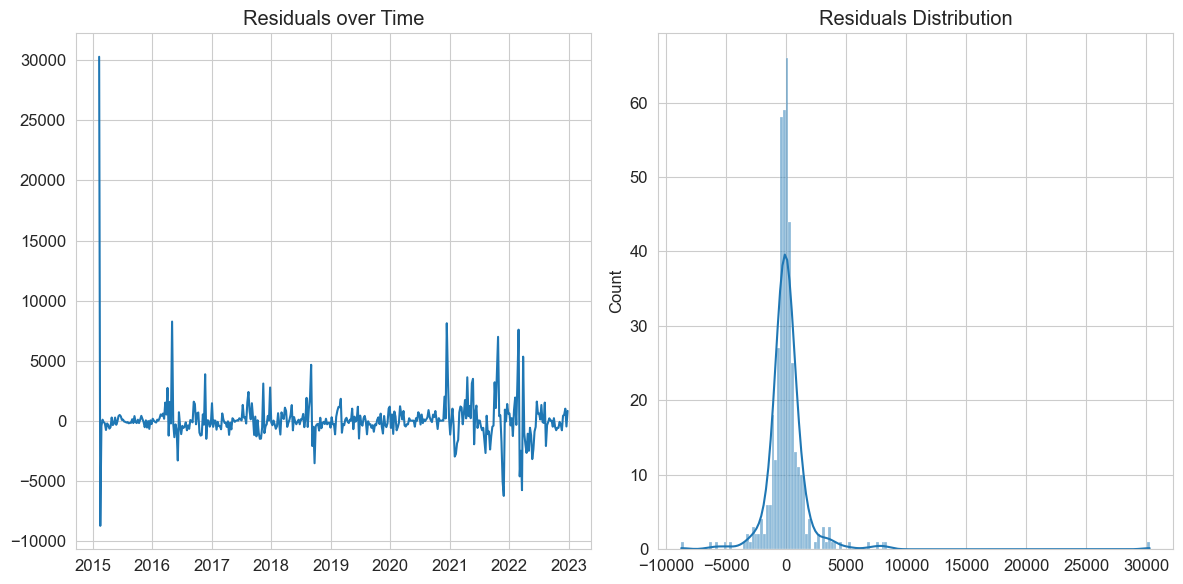

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Настройка стиля графиков
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Загрузка и подготовка данных
def load_and_prepare_data(filepath):
    data = pd.read_csv(filepath)
    data['dt'] = pd.to_datetime(data['dt'])
    data.set_index('dt', inplace=True)
    return data['pfr']  # ARIMA работает с одномерными рядами

# Разделение данных
def split_data(data, test_size=11):
    train = data.head(-test_size)
    test = data.tail(test_size)
    return train, test

# Подбор параметров ARIMA (упрощенная версия)
def find_arima_params(series):
    # В реальном проекте лучше использовать auto_arima или более сложный подбор
    plot_acf(series, lags=20)
    plt.title('Autocorrelation Function')
    plt.show()
    
    plot_pacf(series, lags=20)
    plt.title('Partial Autocorrelation Function')
    plt.show()
    
    # Базовые параметры, которые можно определить по графикам ACF/PACF
    return (1, 1, 1)  # (p, d, q) - в реальном проекте нужно подбирать

# Обучение модели
def train_arima_model(train_series, order):
    model = ARIMA(train_series, order=order)
    fitted_model = model.fit()
    print(fitted_model.summary())
    return fitted_model

# Прогнозирование и оценка модели
def evaluate_arima_model(model, test_series):
    # Прогноз на длину тестовой выборки
    forecast = model.get_forecast(steps=len(test_series))
    y_pred = forecast.predicted_mean
    conf_int = forecast.conf_int()
    
    # Метрики качества
    mae = mean_absolute_error(test_series, y_pred)
    rmse = np.sqrt(mean_squared_error(test_series, y_pred))
    
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    
    return y_pred, conf_int

# Визуализация результатов
def plot_arima_results(train_series, test_series, y_pred, conf_int):
    # Создаем фигуру с двумя subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
    
    # Полный график (train + test)
    ax1.plot(train_series.index, train_series, label='Train', color='green', linewidth=2)
    ax1.plot(test_series.index, test_series, label='Actual', color='blue', linewidth=2)
    ax1.plot(test_series.index, y_pred, label='Forecast', color='red', linestyle='--', linewidth=2)
    ax1.fill_between(test_series.index, 
                    conf_int.iloc[:, 0], 
                    conf_int.iloc[:, 1], 
                    color='pink', alpha=0.3, label='Confidence Interval')
    ax1.set_title('ARIMA Model: Actual vs Forecast Values (Full Series)')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Value')
    ax1.legend()
    ax1.grid(True)
    
    # Тестовый период с доверительным интервалом
    ax2.plot(test_series.index, test_series, label='Actual', color='blue', marker='o', linewidth=2)
    ax2.plot(test_series.index, y_pred, label='Forecast', color='red', marker='x', linestyle='--', linewidth=2)
    ax2.fill_between(test_series.index, 
                    conf_int.iloc[:, 0], 
                    conf_int.iloc[:, 1], 
                    color='pink', alpha=0.3, label='95% Confidence Interval')
    
    # Добавляем линии ошибок
    for idx, (actual, pred) in enumerate(zip(test_series, y_pred)):
        ax2.plot([test_series.index[idx], test_series.index[idx]], [actual, pred], 
                color='gray', linestyle=':', alpha=0.7)
    
    # Вычисляем и отображаем метрики в заголовке
    mae = mean_absolute_error(test_series, y_pred)
    rmse = np.sqrt(mean_squared_error(test_series, y_pred))
    ax2.set_title(f'Test Period (MAE: {mae:.2f}, RMSE: {rmse:.2f})')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Value')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Анализ остатков
def plot_residuals(model):
    residuals = model.resid
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    plt.plot(residuals)
    plt.title('Residuals over Time')
    plt.grid(True)
    
    plt.subplot(122)
    sns.histplot(residuals, kde=True)
    plt.title('Residuals Distribution')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Основной процесс
def main():
    # Загрузка данных
    series = load_and_prepare_data('data_combined_proto.csv')
    
    # Разделение данных
    train, test = split_data(series)
    
    # Подбор параметров ARIMA (в реальном проекте лучше использовать auto_arima)
    order = find_arima_params(train)
    print(f"Selected ARIMA order: {order}")
    
    # Обучение модели
    model = train_arima_model(train, order)
    
    # Оценка модели
    y_pred, conf_int = evaluate_arima_model(model, test)
    
    # Визуализация
    plot_arima_results(train, test, y_pred, conf_int)
    plot_residuals(model)

if __name__ == "__main__":
    main()